## **Project: Study On Panel Data Methodologies With Application To Macroeconometrics (Inflation Forecasting)**.

> ### **Title**: Merge of Dataset.


#### **Table of Contents:**
<ul>
<li><a href="#1">1. .</a></li>
<li><a href="#2">2. .</a></li>
<li><a href="#3">3. .</a></li>
</ul>

<a id=''></a>

#### Final Dataset Table:

- > E. Table for data values `WEO_Data_Countries` name Columns {'WEO_Country_Code', 'Country', 'Advanced_Country', 'Years' , and all Varibles 'WEO_Subject_Code' {'BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGX_NGDP', 'GGXWDG_NGDP', 'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PCPIPCH', 'PPPEX', 'PPPPC', 'PPPSH', 'TM_RPCH', 'TRWMA', 'TX_RPCH'} }

In [2]:
# install 
#!pip install pandas linearmodels statsmodels matplotlib seaborn


**Import Library**

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math

from linearmodels.panel import PanelOLS
import statsmodels.api as sm

sns.set(rc={'figure.figsize': [15,5]}, font_scale=1.2);
pd.set_option('future.no_silent_downcasting', True)


**Load Dataset**

In [61]:
df = pd.read_csv("../03-Dataset/01-Data_Clean.csv")
print(df.shape)
display(df.head())

(1750, 20)


,Country,WEO_Country_Code,Advanced_Country,Year,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH
0,Argentina,213,0,2000,-2.878,21.830,-4.552,40.833,25.247,17.134,-0.789,12.459,15.337,-0.939,0.639,13529.290,0.995,-2.322,10.52,1.898
1,Argentina,213,0,2001,-1.316,21.068,-5.590,48.007,26.432,19.209,-4.409,12.325,13.640,-1.065,0.618,13091.488,0.929,-16.587,9.25,6.096
2,Argentina,213,0,2002,7.666,19.943,1.188,147.203,21.853,22.450,-10.894,17.631,9.965,25.869,0.794,11733.021,0.806,-53.558,12.01,0.244
3,Argentina,213,0,2003,5.597,23.526,3.453,125.162,22.026,17.250,8.955,18.474,12.877,13.443,0.859,12914.244,0.847,48.953,12.87,5.006
4,Argentina,213,0,2004,1.798,26.996,4.719,117.878,23.030,13.625,8.911,19.350,17.551,4.416,0.887,14308.616,0.878,51.050,5.96,-0.150


In [53]:
# خذ قائمة الأعمدة كلها
cols = list(panel_df.columns)

# اشيل PCPIPCH من مكانه الحالي
cols.remove('PCPIPCH')

# ضيف PCPIPCH في آخر القائمة
cols.append('PCPIPCH')

# أعد ترتيب الـ DataFrame حسب الأعمدة الجديدة
panel_df = panel_df[cols]


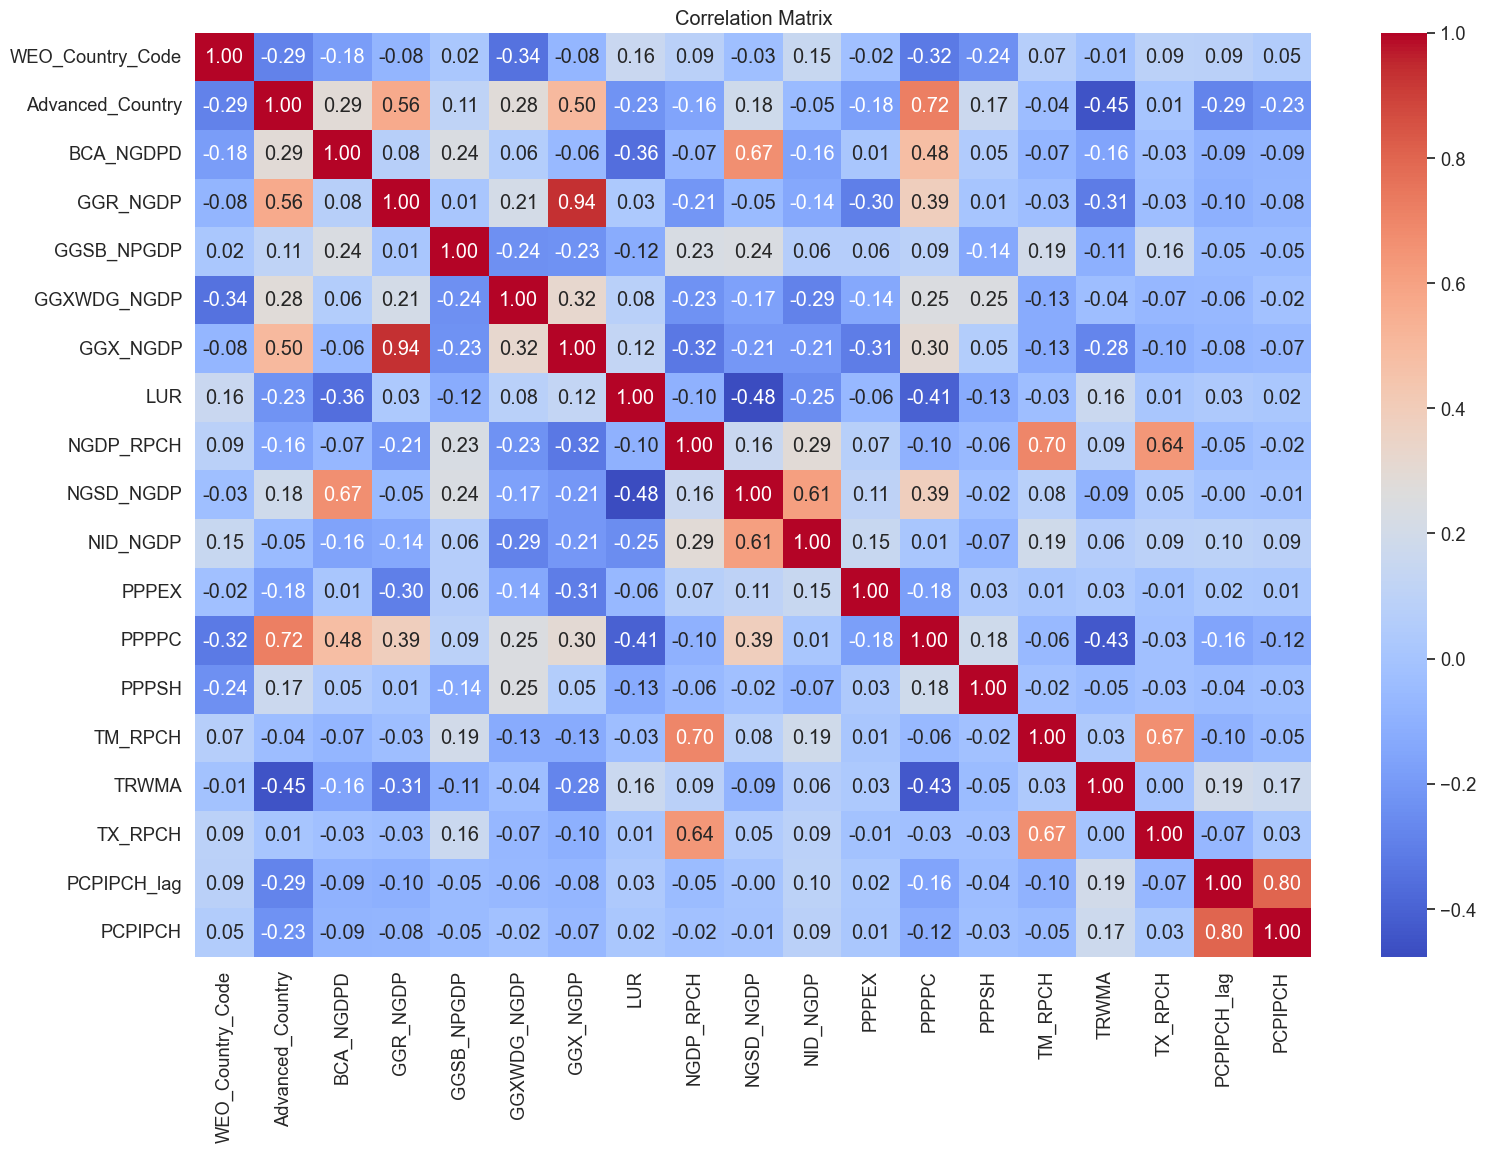

In [56]:

# اختر فقط الأعمدة العددية التي تريد رسمها، مثلاً هنا جميع الأعمدة العددية بدون الأعمدة النصية
numeric_cols = panel_df.select_dtypes(include=['float64', 'int64']).columns

# حساب مصفوفة الارتباط
corr_matrix = panel_df[numeric_cols].corr()

# رسم heatmap
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [66]:
panel_df = df.set_index(['Country', 'Year'])

y = panel_df['PCPIPCH']
X = panel_df[['BCA_NGDPD', 'NGDP_RPCH', 'NGSD_NGDP', 'TRWMA', 'TX_RPCH']]


In [67]:
from linearmodels.panel import PooledOLS

pooled_ols = PooledOLS(y, X)
pooled_ols_results = pooled_ols.fit()
print(pooled_ols_results.summary)


                          PooledOLS Estimation Summary                          
Dep. Variable:                PCPIPCH   R-squared:                        0.2141
Estimator:                  PooledOLS   R-squared (Between):              0.5069
No. Observations:                1750   R-squared (Within):               0.0093
Date:                Fri, May 16 2025   R-squared (Overall):              0.2141
Time:                        23:43:52   Log-likelihood                   -6602.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      95.100
Entities:                          70   P-value                           0.0000
Avg Obs:                       25.000   Distribution:                  F(5,1745)
Min Obs:                       25.000                                           
Max Obs:                       25.000   F-statistic (robust):             95.100
                            

In [43]:
from linearmodels.panel import PanelOLS

fixed_effects = PanelOLS(y, X, entity_effects=True)
fixed_effects_results = fixed_effects.fit()
print(fixed_effects_results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:                PCPIPCH   R-squared:                        0.0600
Estimator:                   PanelOLS   R-squared (Between):             -0.9814
No. Observations:                1750   R-squared (Within):               0.0600
Date:                Fri, May 16 2025   R-squared (Overall):             -0.2262
Time:                        23:32:27   Log-likelihood                   -6294.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      7.0889
Entities:                          70   P-value                           0.0000
Avg Obs:                       25.000   Distribution:                 F(15,1665)
Min Obs:                       25.000                                           
Max Obs:                       25.000   F-statistic (robust):             7.0889
                            

In [44]:
from linearmodels.panel import RandomEffects

random_effects = RandomEffects(y, X)
random_effects_results = random_effects.fit()
print(random_effects_results.summary)


                        RandomEffects Estimation Summary                        
Dep. Variable:                PCPIPCH   R-squared:                        0.0426
Estimator:              RandomEffects   R-squared (Between):             -0.1871
No. Observations:                1750   R-squared (Within):               0.0525
Date:                Fri, May 16 2025   R-squared (Overall):             -0.0134
Time:                        23:32:35   Log-likelihood                   -6347.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5.1440
Entities:                          70   P-value                           0.0000
Avg Obs:                       25.000   Distribution:                 F(15,1734)
Min Obs:                       25.000                                           
Max Obs:                       25.000   F-statistic (robust):             5.1440
                            

In [45]:
from linearmodels.panel import compare

comparison = compare({'Fixed Effects': fixed_effects_results, 'Random Effects': random_effects_results})
print(comparison)


                    Model Comparison                    
                         Fixed Effects    Random Effects
--------------------------------------------------------
Dep. Variable                  PCPIPCH           PCPIPCH
Estimator                     PanelOLS     RandomEffects
No. Observations                  1750              1750
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.0600            0.0426
R-Squared (Within)              0.0600            0.0525
R-Squared (Between)            -0.9814           -0.1871
R-Squared (Overall)            -0.2262           -0.0134
F-statistic                     7.0889            5.1440
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
const                           5.8022            6.3249
                              (1.3332)          (2.1446)
BCA_NGDPD                      -0.3152           -0.2708
                             (-

In [46]:
import numpy as np

b = fixed_effects_results.params.values
B = random_effects_results.params.values
V_b = fixed_effects_results.cov
V_B = random_effects_results.cov
diff = b - B
diff_var = V_b - V_B
from scipy.stats import chi2
stat = np.dot(diff.T, np.linalg.inv(diff_var).dot(diff))
df = diff.shape[0]
p_value = 1 - chi2.cdf(stat, df)
print(f"Hausman test statistic: {stat}, p-value: {p_value}")


Hausman test statistic: 43.90524322796354, p-value: 0.00020389965400446908


In [50]:
from linearmodels.panel import FirstDifferenceOLS

# إضافة المتغير المؤخر (lagged variable)
panel_df['PCPIPCH_lag'] = panel_df.groupby(level=0)['PCPIPCH'].shift(1)
panel_df = panel_df.dropna(subset=['PCPIPCH_lag'])

y_dyn = panel_df['PCPIPCH']
X_dyn = panel_df[[ 'BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGXWDG_NGDP', 'GGX_NGDP',
              'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PPPEX', 'PPPPC', 'PPPSH',
              'TM_RPCH', 'TRWMA', 'TX_RPCH']]

# لا تضف const
fd_model = FirstDifferenceOLS(y_dyn, X_dyn)
fd_results = fd_model.fit()
print(fd_results.summary)


                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                PCPIPCH   R-squared:                        0.1258
Estimator:         FirstDifferenceOLS   R-squared (Between):             -12.616
No. Observations:                1400   R-squared (Within):              -0.2568
Date:                Fri, May 16 2025   R-squared (Overall):             -5.8034
Time:                        23:35:18   Log-likelihood                   -4329.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      13.291
Entities:                          70   P-value                           0.0000
Avg Obs:                       21.000   Distribution:                 F(15,1385)
Min Obs:                       21.000                                           
Max Obs:                       21.000   F-statistic (robust):             13.291
                            

<a id='1'></a>

### **1. :**

<a id='2'></a>

### **2. :**

<a id='3'></a>

### **3. Apply the interpolation to Missing Values:**

# **END**